In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [43]:
start = '2015-01-01'
end = '2025-08-07'

stock = 'TSLA'

data = yf.download(stock, start , end)

C:\Users\prath\AppData\Local\Temp\ipykernel_20180\2080841062.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start , end)
[*********************100%***********************]  1 of 1 completed


In [45]:
 data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500
...,...,...,...,...,...,...
2659,2025-07-31,308.269989,321.369995,306.100006,319.609985,85270900
2660,2025-08-01,302.630005,309.309998,297.820007,306.209991,89121400
2661,2025-08-04,309.260010,312.119995,303.000000,309.079987,78683900


In [47]:
data.drop('level_0',axis=1, inplace=True)

KeyError: 'level_0'

In [49]:
# Flatten MultiIndex column labels
data.columns = ['_'.join(col).strip() if col[1] else col[0] for col in data.columns]

In [51]:
print(data.columns)

Index(['Date', 'Close_TSLA', 'High_TSLA', 'Low_TSLA', 'Open_TSLA',
       'Volume_TSLA'],
      dtype='object')


In [53]:
data

,Date,Close_TSLA,High_TSLA,Low_TSLA,Open_TSLA,Volume_TSLA
0,2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500
...,...,...,...,...,...,...
2659,2025-07-31,308.269989,321.369995,306.100006,319.609985,85270900
2660,2025-08-01,302.630005,309.309998,297.820007,306.209991,89121400
2661,2025-08-04,309.260010,312.119995,303.000000,309.079987,78683900
2662,2025-08-05,308.720001,312.450012,305.500000,308.950012,57961300


In [55]:
ma_100_days = data.Close_TSLA.rolling(100).mean()      # moving average of 100 days

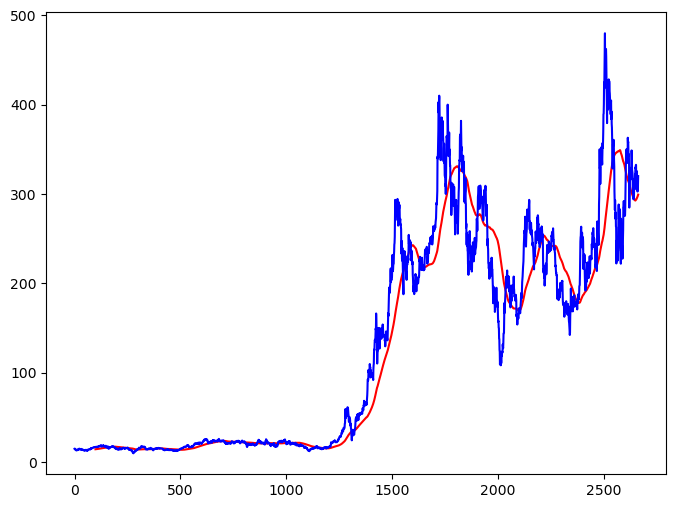

In [57]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close_TSLA, 'b')
plt.show()

In [59]:
ma_200_days = data.Close_TSLA.rolling(200).mean()  #  # moving average of 200 days


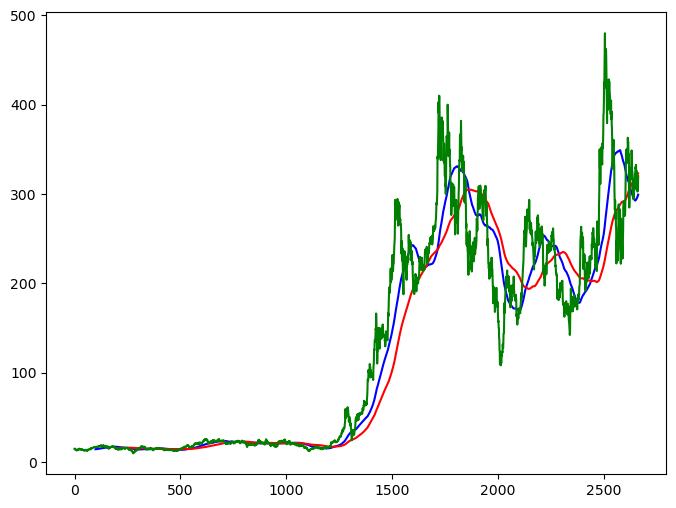

In [61]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'b')   
plt.plot(ma_200_days, 'r')    
plt.plot(data.Close_TSLA, 'g')
plt.show()            

In [63]:
data.dropna(inplace=True)   # removing null values

In [65]:
data_train = pd.DataFrame(data.Close_TSLA[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close_TSLA[int(len(data)*0.80): len(data)])

In [67]:
data_train.shape[0]

2131

In [69]:
data_test.shape[0]

533

In [71]:

# use MinMaxScaler for fit dat in 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler(feature_range=(0,1))

In [72]:
data_train_scale  = scaler.fit_transform(data_train)

In [73]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [77]:
x,y = np.array(x), np.array(y)   # data set to convert in arrays

In [79]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [80]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential    # sequential use for predict the data based on time series

In [81]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences =True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))   # dropout used means the model is not overfitted

model.add(LSTM(units = 60, activation ='relu', return_sequences =True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))



C:\Users\prath\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [82]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [86]:
model.fit(x,y, epochs = 50, batch_size= 32, verbose  =1) # verbose means printing model

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 0.0022
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0023
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.0025
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.0026
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.0025
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0023
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0025
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.0025
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0026
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 0.0024
Epoch 11/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0026
Epoch 12/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0027
Epoch 13/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0027
Epoch 14/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0022
Epoch 15/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.00

In [85]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [92]:
pass_100_days  = data_train.tail(100)


In [94]:
data_test  = pd.concat([pass_100_days, data_test], ignore_index=True)

In [100]:
data_test_scale = scaler.fit_transform(data_test)

In [104]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x,y  = np.array(x), np.array(y)

In [106]:
y_predict = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step


In [128]:
scale = 1/scaler.scale_

In [130]:
y_predict  = y_predict*scale

In [132]:
y = y*scale

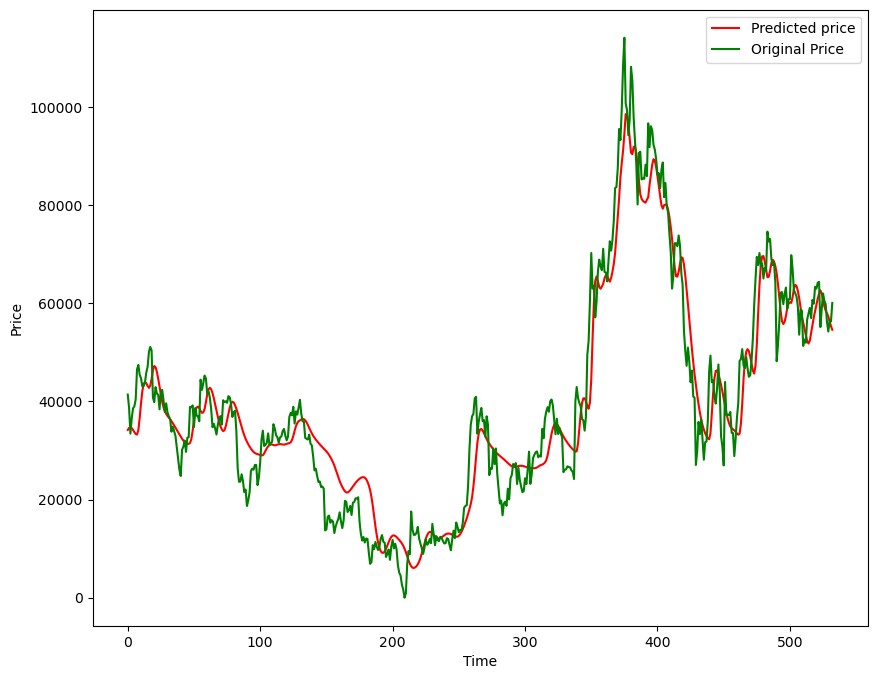

In [136]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted price')
plt.plot(y, 'g', label= 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [138]:
model.save('Stock Predictions Model.keras')